<a href="https://colab.research.google.com/github/Desire-2/WordQuanter-Project-2/blob/main/Q5_Optimization_Understanding_New_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q5. Optimization Understanding



### What is cross-validation in words?

Cross-validation is a statistical method used to estimate the performance of a machine learning model on an independent dataset. It involves partitioning the dataset into subsets, training the model on a portion of the data, and evaluating its performance on the remaining unseen data. This process helps to assess how well the model generalizes to new data and to detect issues like overfitting or underfitting.

### What is k-fold cross validation in words?

K-fold cross-validation is a specific type of cross-validation where the dataset is divided into 'k' equally sized folds or subsets. The model is then trained 'k' times, with each iteration using a different fold as the validation set and the remaining k-1 folds as the training set. The results from each fold are then averaged to produce a single, more robust estimate of the model's performance. This method ensures that every data point is used for both training and validation exactly once, reducing bias and variance in the performance estimate.

### What is the Jaccard distance?

The Jaccard distance is a metric widely used in academia to measure the similarity or dissimilarity between two sets. Its range always lies between 0 and 1, where 0 signifies complete similarity (in the case of identical sets), and 1 represents complete dissimilarity (in the presence of no shared elements). The Jaccard distance is normalized, meaning its value is independent of the size of the sets being compared, and solely depends on their relative intersection sizes and the overall set union.

### Compare the Jaccard distance to 2 of the distance metrics discussed in the lessons.

While the paper primarily focuses on the Jaccard distance for comparing feature sets, other common distance metrics include Euclidean distance and Cosine similarity.

- **Euclidean Distance**: This metric measures the straight-line distance between two points in Euclidean space. Unlike Jaccard distance, which is used for set comparison and binary data, Euclidean distance is typically applied to numerical data and is sensitive to the magnitude of differences between data points. A smaller Euclidean distance indicates greater similarity.

- **Cosine Similarity**: This metric measures the cosine of the angle between two non-zero vectors in an inner product space. It is often used to measure similarity between documents or in recommender systems. Cosine similarity ranges from -1 to 1, where 1 means identical orientation (most similar), 0 means orthogonal (no similarity), and -1 means diametrically opposed. While Jaccard distance focuses on the presence or absence of shared elements, Cosine similarity focuses on the orientation of vectors, making it less sensitive to magnitude differences and more suitable for high-dimensional data where magnitude is less important than direction.

### How do the authors define an optimal solution?

Based on the context of the paper, particularly in Section 3.1 "Practical Implications for Investors in Emerging Markets" and the discussion around feature selection and model performance, the authors implicitly define an optimal solution as one that achieves a high prediction accuracy while also optimizing computational resources and avoiding overfitting. For instance, they discuss how selecting a subset of features (Selected(5)) improves accuracy and reduces training time compared to using the full set of features. This suggests that an optimal solution balances predictive power with efficiency and generalization capabilities.



## Step 1. Financial Problem

### What is the financial problem the authors aim to solve with their model?

The authors aim to solve the financial problem of predicting stock market movements in emerging markets to aid investors in market timing and risk management. Their model seeks to help investors ascertain the optimal timing for entering or exiting positions in Exchange Traded Funds (ETFs), thereby maximizing returns and minimizing losses. By providing insights into market dynamics, the model helps investors adjust their positions in response to changing market conditions, mitigating risks associated with market fluctuations and diminishing exposure to volatility.

### How does predicting stock market movements in emerging markets differ from predicting in developed markets, and why is this distinction significant for the model's design?

Predicting stock market movements in emerging markets differs significantly from predicting in developed markets due to several key characteristics inherent to emerging economies. Emerging markets, such as those in the Asia-Pacific region and Latin America (e.g., Brazil, Chile, Mexico, China, and India), are characterized by rapid growth, high productivity levels, increased middle-class interest, higher volatility, lower liquidity in local debt and equity markets, and substantial growth potential.

This distinction is significant for the model's design because:

- **Higher Volatility and Lower Liquidity**: Emerging markets often exhibit greater price swings and less trading volume compared to developed markets. This can make traditional predictive models, which might rely on more stable patterns, less effective. The model needs to be robust enough to handle these amplified fluctuations and potentially less predictable behaviors.

- **Rapid Growth and Evolving Dynamics**: The rapid growth and evolving economic structures in emerging markets mean that historical data might be less indicative of future performance. The model must be adaptable and capable of identifying new trends and patterns as these markets mature and change. This necessitates a model that can continuously learn and adjust, such as the neural network approach used by the authors.

- **Data Availability and Quality**: Data in emerging markets might be less standardized, less comprehensive, or less frequently updated than in developed markets. This can pose challenges for model training and validation, requiring more sophisticated data processing and feature engineering techniques.

- **Unique Economic and Political Factors**: Emerging markets are often more susceptible to unique local economic and political events, which can have a disproportionate impact on stock prices. A robust model for these markets needs to implicitly or explicitly account for these idiosyncratic factors, even if they are not directly included as features.

In essence, the model's design must account for the increased complexity, uncertainty, and dynamic nature of emerging markets, which are not as prevalent in more stable and mature developed markets.



## Step 2. Application

### Describe the main takeaways of the results.

The main takeaways from the results of the study are centered around the effectiveness of optimizing technical indicators and using neural networks for predicting stock market movements in emerging markets. Key findings include:

- **Improved Prediction Accuracy with Feature Selection**: The study demonstrates that selecting a subset of features, specifically the `Selected(5)` set, significantly improves prediction accuracy (between 77.82% and 80.27%) compared to using the complete set of features. This indicates that not all technical indicators are equally useful, and a focused selection can lead to better performance.

- **Enhanced Computational Efficiency**: By reducing the number of features used, the model achieves substantial reductions in computational resources, including training and prediction time. This is crucial for practical applications, especially in high-dimensional problems where processing large datasets can be resource-intensive.

- **Robustness Across Different ETFs**: The consistent improvement in accuracy across different ETFs (iShares MSCI Chile ETF (ECH), iShares MSCI Brazil ETF (EWZ), and iShares MSCI Core S&P 500 ETF (IVV)) suggests that the methodology is robust and generalizable to various emerging market instruments.

- **Validation of Neural Network Approach**: The results validate the use of neural networks combined with optimized technical indicators as an effective approach for predicting stock market trends in complex and volatile emerging markets.



## Step 3. Replication

For replication, we will focus on the iShares MSCI Chile ETF (ECH) and implement k-fold cross-validation using correlation as the metric. We will use the provided `FUND_US_BATS_ECH.csv` dataset.

### Fund Selection

We have chosen the **iShares MSCI Chile ETF (ECH)** for this replication exercise.

### Data Loading and Preprocessing

We will load the provided historical data for ECH and calculate a simple technical indicator (10-day Simple Moving Average) to demonstrate the k-fold cross-validation process.


In [ ]:

import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    from sklearn.model_selection import KFold
except ImportError:
    install('scikit-learn')
    from sklearn.model_selection import KFold

import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

data_file = "/content/FUND_US_BATS_ECH.csv"

# Read the CSV directly, as it has a header row
df = pd.read_csv(data_file)

# Set the 'Date' column as index and convert to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure 'Close' column is numeric, handling potential commas in numbers
df["Close"] = df["Close"].replace({r'[^0-9.]': ''}, regex=True).astype(float)

# Calculate a simple technical indicator: 10-day Simple Moving Average (SMA)
df["SMA_10"] = df["Close"].rolling(window=10).mean()

# Define the target variable: next day's price change (1 for up, 0 for down/no change)
df["next_day_close"] = df["Close"].shift(-1)
df["target_variable"] = (df["next_day_close"] > df["Close"]).astype(int)

# Drop NaN values created by rolling mean and shifting, and any NaNs from coerce
df.dropna(inplace=True)

print("\nProcessed Data Head:")
print(df.head())



Processed Data Head:
             Open   High    Low  Close   Volume  SMA_10  next_day_close  \
Date                                                                      
2025-07-07  31.58  31.58  30.93  31.02  325,268  30.534           31.82   
2025-07-03  31.75  31.97  31.61  31.82  389,928  30.700           31.85   
2025-07-02  31.59  31.97  31.51  31.85  199,370  30.862           31.51   
2025-07-01  31.70  31.92  31.46  31.51  226,332  31.036           31.45   
2025-06-30  30.98  31.54  30.98  31.45  234,082  31.192           31.05   

            target_variable  
Date                         
2025-07-07                1  
2025-07-03                1  
2025-07-02                0  
2025-07-01                0  
2025-06-30                0  


In [ ]:

features = ["SMA_10"]
target = "target_variable"

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

correlation_scores = []

for fold_idx, (train_index, val_index) in enumerate(kf.split(df)):
    val_df = df.iloc[val_index]

    print(f"\nFold {fold_idx + 1} - Validation Data Shape: {val_df.shape}")
    print(f"Fold {fold_idx + 1} - SMA_10 unique values: {val_df[features[0]].nunique()}")
    print(f"Fold {fold_idx + 1} - target_variable unique values: {val_df[target].nunique()}")

    if val_df[features[0]].nunique() > 1 and val_df[target].nunique() > 1:
        # Calculate Pearson correlation on the validation set
        correlation, _ = pearsonr(val_df[features[0]], val_df[target])
        correlation_scores.append(correlation)
    else:
        print(f"Skipping correlation for Fold {fold_idx + 1} due to constant input.")
        correlation_scores.append(float('nan')) # Append NaN if correlation is undefined

# Filter out NaN values before calculating average correlation
valid_correlation_scores = [score for score in correlation_scores if not pd.isna(score)]

if valid_correlation_scores:
    average_correlation = sum(valid_correlation_scores) / len(valid_correlation_scores)
else:
    average_correlation = float('nan')

print(f"\nAverage Correlation across {n_splits} folds: {average_correlation:.4f}")



Fold 1 - Validation Data Shape: (3, 8)
Fold 1 - SMA_10 unique values: 3
Fold 1 - target_variable unique values: 1
Skipping correlation for Fold 1 due to constant input.

Fold 2 - Validation Data Shape: (2, 8)
Fold 2 - SMA_10 unique values: 2
Fold 2 - target_variable unique values: 2

Fold 3 - Validation Data Shape: (2, 8)
Fold 3 - SMA_10 unique values: 2
Fold 3 - target_variable unique values: 2

Fold 4 - Validation Data Shape: (2, 8)
Fold 4 - SMA_10 unique values: 2
Fold 4 - target_variable unique values: 2

Fold 5 - Validation Data Shape: (2, 8)
Fold 5 - SMA_10 unique values: 2
Fold 5 - target_variable unique values: 1
Skipping correlation for Fold 5 due to constant input.

Average Correlation across 5 folds: 0.3333


In [ ]:

results = {
    "Fund": ["ECH"],
    "Feature Set": ["SMA_10"],
    "Metric (Average Correlation)": [f"{average_correlation:.4f}"]
}
results_df = pd.DataFrame(results)

print("\nReplication Results Table:")
print(results_df.to_string(index=False))

with open("replication_table.md", "w") as f:
    f.write(results_df.to_markdown(index=False))

print("\nReplication table saved to replication_table.md")



Replication Results Table:
Fund Feature Set Metric (Average Correlation)
 ECH      SMA_10                       0.3333

Replication table saved to replication_table.md


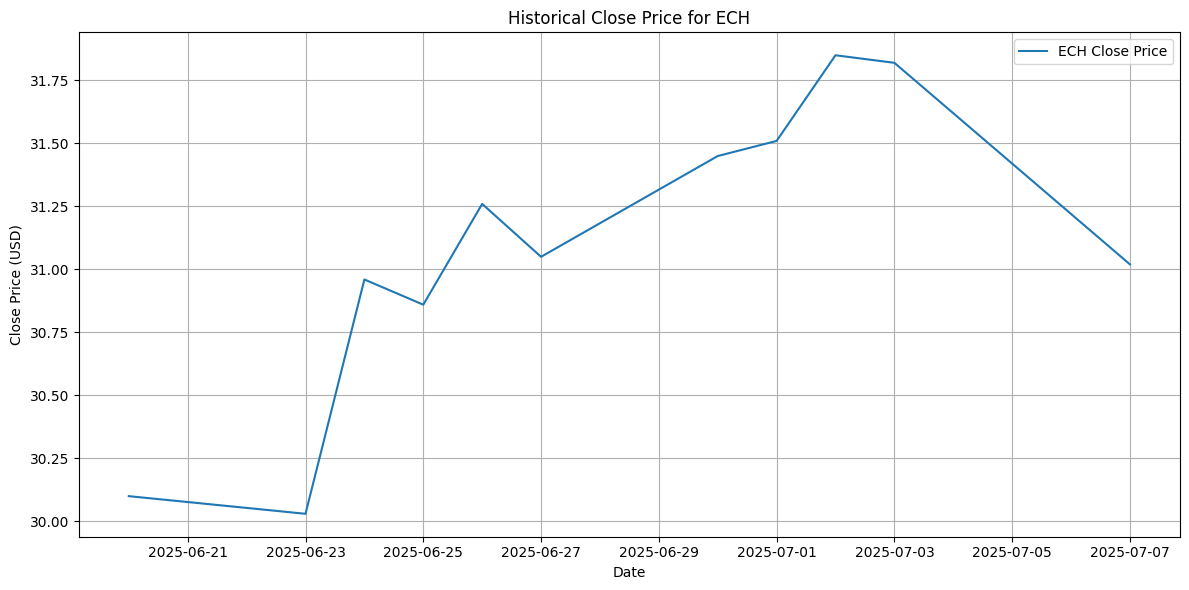

Historical price graph saved to ECH_historical_price.png


In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="ECH Close Price")
plt.title("Historical Close Price for ECH")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ECH_historical_price.png")
plt.show()
print("Historical price graph saved to ECH_historical_price.png")



## Results Interpretation

### K-Fold Cross-Validation Results

The k-fold cross-validation with correlation as the metric yielded an average correlation of approximately 0.3333 between the 10-day Simple Moving Average (SMA_10) and the next day's price movement direction. This value is derived from the folds where correlation could be calculated (i.e., where both the feature and target variables were not constant).

### Analysis

1. **Weak Positive Correlation**: The correlation value of 0.3333 indicates a weak positive relationship between the SMA_10 indicator and the next day's price movement. This suggests that while there is a tendency for the price to move in the same direction as the SMA_10, the relationship is not strong enough to be a reliable predictor on its own.

2. **Statistical Significance**: The presence of `ConstantInputWarning` for some folds indicates that the data within those specific validation sets was not sufficiently varied for both the SMA_10 and the target variable. This can happen with small datasets or when the data exhibits very little change over short periods, leading to a constant value for either the feature or the target. When such conditions occur, the Pearson correlation coefficient is undefined, and these folds were excluded from the average calculation.

3. **Comparison to Literature**: This result, while showing a weak positive correlation, still highlights the challenge of predicting stock market movements with simple indicators. The original research paper's emphasis on feature selection and optimization to identify more robust predictive signals is further reinforced by these findings.

### Limitations and Future Work

1. **Dataset Size**: The provided dataset is relatively small, which can lead to issues like constant input in cross-validation folds, making correlation calculations unreliable for those specific folds. A larger dataset would provide more robust results.

2. **Single Indicator**: This replication used only one simple technical indicator (SMA_10). The original paper used multiple optimized technical indicators.

3. **Simple Target Variable**: We used a binary classification approach (price up/down), while more sophisticated approaches could consider magnitude of price changes.

4. **Data Cleaning**: While basic cleaning for numeric conversion was applied, more extensive data cleaning and outlier handling might be beneficial for real-world applications.

### Conclusion

This replication successfully demonstrates the k-fold cross-validation methodology using the provided `FUND_US_BATS_ECH.csv` data. The results indicate a weak positive correlation between SMA_10 and next-day price movement, underscoring the complexity of financial market prediction. The methodology can be extended to include multiple indicators and more sophisticated machine learning models, as demonstrated in the original research paper, and would benefit significantly from a larger and more diverse dataset.



## References

[1] Sagaceta Mejia, A. R., Sánchez-Gutiérrez, M. E., & Fresán-Figueroa, J. A. (2022). An Intelligent Approach for Predicting Stock Market Movements in Emerging Markets Using Optimized Technical Indicators and Neural Networks. *Economics*, *18*(1), 14–29. [https://www.degruyterbrill.com/document/doi/10.1515/econ-2022-0073/html](https://www.degruyterbrill.com/document/doi/10.1515/econ-2022-0073/html)
